# **Outlier Detection using Z-Score**

In [ ]:
# Import Libray
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Import Dataset
data = pd.read_csv('DataSets/insurance.csv')

In [ ]:
# first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Data set Shape
data.shape

(1338, 7)

### Get Idea in dataset

**Visualization for dataset in charges column**

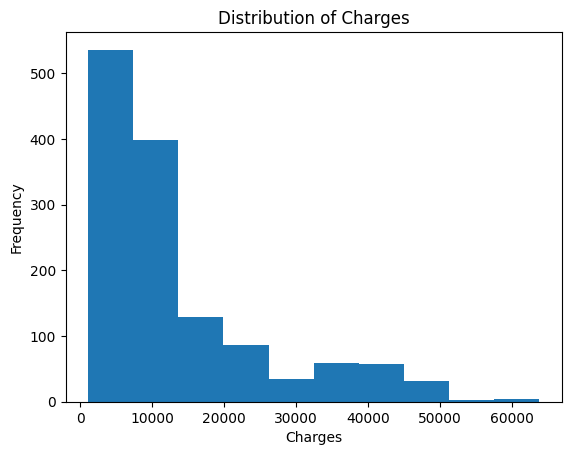

In [ ]:
plt.hist(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Get mean value in charges column**

In [ ]:
mean =  np.mean(data['charges'])
mean

13270.422265141257

**Get Standat diviation value in charges column**

In [ ]:
std = np.std(data['charges'])
std

12105.484975561605

**Get Z-sore value in charges column**

In [ ]:
(data['charges']-mean)/std

,charges
0,0.298584
1,-0.953689
2,-0.728675
3,0.719843
4,-0.776802
...,...
1333,-0.220551
1334,-0.914002
1335,-0.961596
1336,-0.930362


**Put Z-score values in dataset**

In [ ]:
data['Charges z-score'] = (data['charges']-mean)/std

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Charges z-score
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802


### Determinda Threshold value (You can take any value you like. Usually (between -3 and 3 )

In [ ]:
data[data['Charges z-score']>3] # More than 3 values ​​in the dataset

,age,sex,bmi,children,smoker,region,charges,Charges z-score
34,28,male,36.400,1,yes,southwest,51194.55914,3.132806
543,54,female,47.410,0,yes,southeast,63770.42801,4.171663
577,31,female,38.095,1,yes,northeast,58571.07448,3.742159
819,33,female,35.530,0,yes,northwest,55135.40209,3.458348
1146,60,male,32.800,0,yes,southwest,52590.82939,3.248148
1230,52,male,34.485,3,yes,northwest,60021.39897,3.861966
1300,45,male,30.360,0,yes,southeast,62592.87309,4.074389


In [ ]:
data[data['Charges z-score']<-3] # Less than -3 values ​​in the dataset

,age,sex,bmi,children,smoker,region,charges,Charges z-score


**Taking the lowest value in charges column**

In [ ]:
# use min()
data['Charges z-score'].min()

-1.0035573452584996

**Taking the hights value in charges column**

In [ ]:
# use max()
data['Charges z-score'].max()

4.1716631631700425

### **Removeing Outlier**

In [ ]:
# Create variable for store index number
outlier_indexes = []

**Use index number**

In [ ]:
# Store Index numbers
#data.index[data['Charges z-score']>3]


In [ ]:
# Convert List in index numbers
# data.index[data['Charges z-score']>3].tolist()

**Extand List**

In [ ]:
outlier_indexes.extend(data.index[data['Charges z-score']>3].tolist())

In [ ]:
outlier_indexes

[34, 543, 577, 819, 1146, 1230, 1300]

In [ ]:
outlier_indexes.extend(data.index[data['Charges z-score']<-3].tolist())

In [ ]:
outlier_indexes

[34, 543, 577, 819, 1146, 1230, 1300]

**Remove index value**

In [ ]:
new_data = data.drop(data.index[outlier_indexes])

In [ ]:
new_data.head()

,age,sex,bmi,children,smoker,region,charges,Charges z-score
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802


In [ ]:
# Before Dataset shape
data.shape

(1338, 8)

In [ ]:
# After Dataset Shape
new_data.shape

(1331, 8)

In [ ]:
# Only rows in new and old dataset
data.shape[0], new_data.shape[0]

(1338, 1331)

**Remove Z-score column in dataset**

In [ ]:
# Remove Z-score column in dataset, if it exists
if 'Charges z-score' in new_data.columns:
    new_data = new_data.drop('Charges z-score', axis=1)
else:
    print("Column 'Charges z-score' not found in DataFrame.")

new_data.head(5)

Column 'Charges z-score' not found in DataFrame.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **Visualization for dataset in charges column**

**Old Dataset**

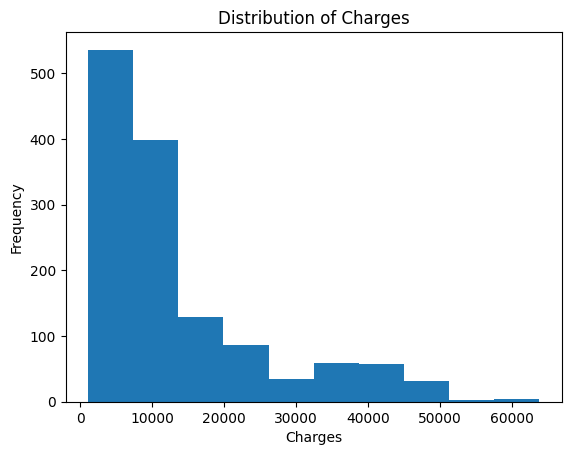

In [ ]:
plt.hist(data['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()

**New Dataset**

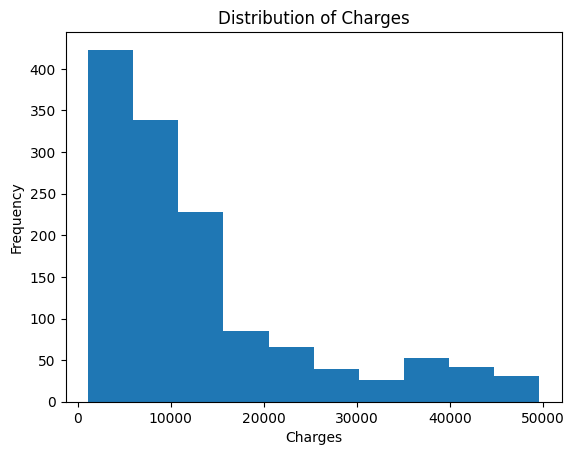

In [ ]:
plt.hist(new_data['charges'])
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()